In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import recall_score,precision_score,classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# EDA

In [40]:
data=pd.read_csv("employee_attrition_dataset_10000.csv")
data.head(5)

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Male,Single,Finance,Manager,5,7332,81,24,...,No,9,48,16,4,1,1,49,3,No
1,2,48,Female,Divorced,HR,Assistant,4,6069,55,18,...,Yes,9,57,10,4,1,1,25,1,No
2,3,34,Female,Married,Marketing,Manager,4,11485,65,6,...,Yes,3,55,1,1,4,3,21,1,Yes
3,4,27,Female,Divorced,HR,Manager,4,18707,28,12,...,No,9,53,2,3,4,1,46,2,No
4,5,40,Male,Married,HR,Analyst,1,16398,92,3,...,No,1,54,11,1,1,1,43,4,No


In [41]:
data=data.drop(["Employee_ID"],axis=1)

In [42]:
le=LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])
data["Marital_Status"]=le.fit_transform(data["Marital_Status"])
data["Department"]=le.fit_transform(data["Department"])
data["Job_Role"]=le.fit_transform(data["Job_Role"])
data["Overtime"]=le.fit_transform(data["Overtime"])
data["Attrition"]=le.fit_transform(data["Attrition"])

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age                            10000 non-null  int64
 1   Gender                         10000 non-null  int64
 2   Marital_Status                 10000 non-null  int64
 3   Department                     10000 non-null  int64
 4   Job_Role                       10000 non-null  int64
 5   Job_Level                      10000 non-null  int64
 6   Monthly_Income                 10000 non-null  int64
 7   Hourly_Rate                    10000 non-null  int64
 8   Years_at_Company               10000 non-null  int64
 9   Years_in_Current_Role          10000 non-null  int64
 10  Years_Since_Last_Promotion     10000 non-null  int64
 11  Work_Life_Balance              10000 non-null  int64
 12  Job_Satisfaction               10000 non-null  int64
 13  Performance_Ratin

# Feature Engineering

In [44]:
ss=StandardScaler()
x=data.drop(["Attrition"],axis=1)
y=data["Attrition"]
x=ss.fit_transform(x)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model

In [46]:
clf={
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Logistic Regression":LogisticRegression()
}

In [47]:
hyperparameters = {
    "Random Forest Classifier": {
        "n_estimators": 100,
        "max_depth": None,
        "min_samples_split": 2,
        "min_samples_leaf": 1,
        "max_features": 'sqrt',
        "criterion": 'gini',
        "bootstrap": True,
        "oob_score": False,
        "random_state": 42
    },
    "Decision Tree Classifier": {
        "criterion": 'gini',
        "max_depth": None,
        "min_samples_split": 2,
        "min_samples_leaf": 1,
        "max_features": None,
        "splitter": 'best',
        "random_state": 42,
        "class_weight": None
    },
    "Ada Boost Classifier": {
        "n_estimators": 50,
        "learning_rate": 1.0,
        "algorithm": 'SAMME.R',
        "random_state": 42
    },
    "Logistic Regression": {
        "penalty": 'l2',
        "C": 1.0,
        "solver": 'lbfgs',
        "max_iter": 100,
        "fit_intercept": True,
        "class_weight": None,
        "random_state": 42,
        "multi_class": 'auto',
        "warm_start": False
    }
}

# Results

Random Forest Classifier
Accuracy:0.796
Classification report              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1592
           1       0.00      0.00      0.00       408

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



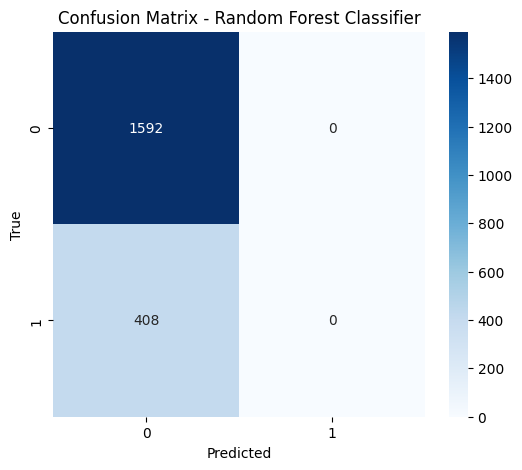

Decision Tree Classifier
Accuracy:0.668
Classification report              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1592
           1       0.21      0.23      0.22       408

    accuracy                           0.67      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.68      0.67      0.67      2000



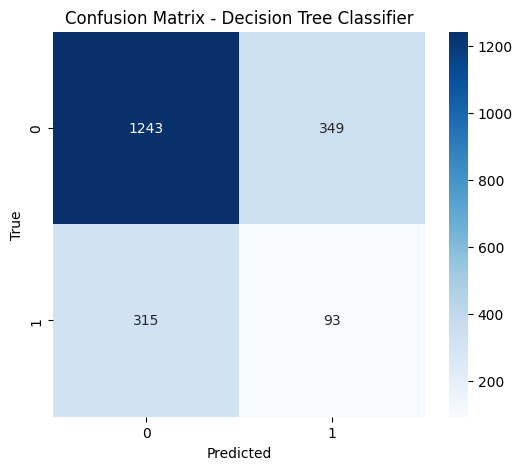

Ada Boost Classifier
Accuracy:0.796
Classification report              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1592
           1       0.00      0.00      0.00       408

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



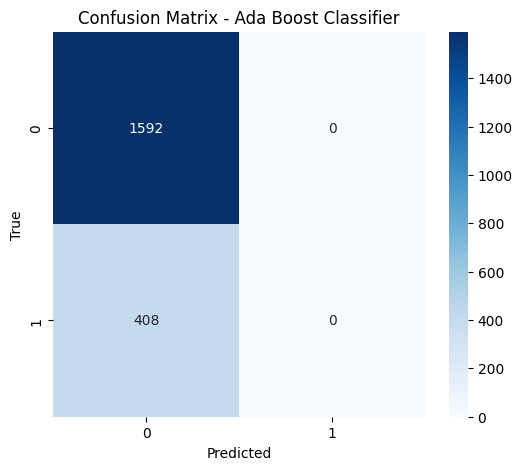

Logistic Regression
Accuracy:0.796
Classification report              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1592
           1       0.00      0.00      0.00       408

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



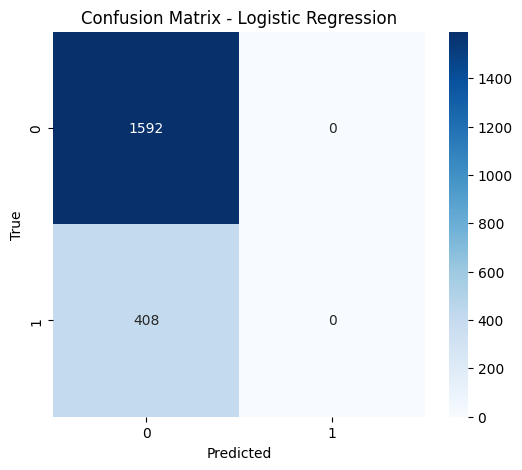

In [50]:
for name,model in clf.items():
    print(f"{name}")
    model.set_params(**hyperparameters[name])
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"Accuracy:{accuracy}")
    print(f"Classification report{classification_report(y_test,y_pred)}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()